In [1]:
import os
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pylab as plt
from collections import defaultdict

In [2]:
#accuracy [not accurate,cannot comment,somewhat accurate, accurate]
#interpretability and others [not, easy]
## SHAP plot
exp_A = {'task_1': {'accuracy': [0,4,1,0],
         'interpretability':[5,0],
         'accessibility':[4,1],
         'usefulness':[5,0],
         'specificity':[0,5]},

        'task_2': {'accuracy': [0,4,1,0],
                'interpretability':[5,0],
                'accessibility':[5,0],
                'usefulness':[5,0],
                'specificity':[0,5]},

        'task_3': {'accuracy': [0,4,1,0],
                'interpretability':[4,1],
                'accessibility':[4,1],
                'usefulness':[5,0],
                'specificity':[0,5]},

        'task_4': {'accuracy': [0,4,1,0],
                'interpretability':[4,1],
                'accessibility':[5,0],
                'usefulness':[5,0],
                'specificity':[0,5]},

        'task_5': {'accuracy': [0,5,0,0],
                'interpretability':[5,0],
                'accessibility':[4,1],
                'usefulness':[5,0],
                'specificity':[0,5]} 
         }

#accuracy [not accurate,cannot comment,somewhat accurate, accurate]
#interpretability and others [not, easy]
## chatgpt
exp_B = {'task_1': {'accuracy': [0,0,4,1],
         'interpretability':[0,5],
         'accessibility':[0,5],
         'usefulness':[2,3],
         'specificity':[5,0]},

        'task_2': {'accuracy': [0,0,3,2],
                'interpretability':[0,5],
                'accessibility':[0,5],
                'usefulness':[2,3],
                'specificity':[5,0]},

        'task_3': {'accuracy': [0,0,2,3],
                'interpretability':[0,5],
                'accessibility':[0,5],
                'usefulness':[1,4],
                'specificity':[5,0]},

        'task_4': {'accuracy': [0,0,2,3],
                'interpretability':[0,5],
                'accessibility':[0,5],
                'usefulness':[2,3],
                'specificity':[5,0]},

        'task_5': {'accuracy': [0,1,4,0],
                'interpretability':[0,5],
                'accessibility':[0,5],
                'usefulness':[1,4],
                'specificity':[5,0]} 
         }

#accuracy [not accurate,cannot comment,somewhat accurate, accurate]
#interpretability and others [not, easy]
## XpertAI
exp_C = {'task_1': {'accuracy': [0,0,2,3],
         'interpretability':[0,5],
         'accessibility':[0,5],
         'usefulness':[1,4],
         'specificity':[0,5]},

        'task_2': {'accuracy': [0,0,1,4],
                'interpretability':[0,5],
                'accessibility':[0,5],
                'usefulness':[0,5],
                'specificity':[0,5]},

        'task_3': {'accuracy': [0,1,2,2],
                'interpretability':[0,5],
                'accessibility':[0,5],
                'usefulness':[1,4],
                'specificity':[0,5]},

        'task_4': {'accuracy': [0,0,2,3],
                'interpretability':[0,5],
                'accessibility':[0,5],
                'usefulness':[0,5],
                'specificity':[0,5]},

        'task_5': {'accuracy': [0,3,1,0],
                'interpretability':[1,4],
                'accessibility':[1,4],
                'usefulness':[3,2],
                'specificity':[0,5]} 
         }



In [5]:
def plot_radar(exp_A_data,exp_B_data,exp_C_data,task_num,exp_A_er,exp_B_er,exp_C_er,figname=None):
    colA = '#5402a3'
    colB = '#b93389' 
    colC =  '#febc2b'
    

    spoke_labels = np.concatenate((list(exp_A_data.keys()),['accuracy']))
    spoke_labels = [lab.capitalize() for lab in spoke_labels]
    plt.figure(figsize=(4,4))
    ax = plt.subplot(polar=True)

    exA = np.concatenate((list(exp_A_data.values()),[list(exp_A_data.values())[0]]))
    exB = np.concatenate((list(exp_B_data.values()),[list(exp_B_data.values())[0]]))
    exC = np.concatenate((list(exp_C_data.values()),[list(exp_C_data.values())[0]]))

    exA_er = np.concatenate((list(exp_A_er.values()),[list(exp_A_er.values())[0]]))
    exB_er = np.concatenate((list(exp_B_er.values()),[list(exp_B_er.values())[0]]))
    exC_er = np.concatenate((list(exp_C_er.values()),[list(exp_C_er.values())[0]]))
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(exA)) #radar_factory(5, frame='polygon')
    
    ax.plot(label_loc,exA  , color=colA, linewidth=1, label='SHAP only',zorder=10)
    ax.fill(label_loc, exA, facecolor=colA, alpha=0.25, label='_nolegend_',zorder=10)
    ax.errorbar(label_loc,exA, yerr=exA_er, c=colA, zorder=10, alpha=0.5,elinewidth=1)

    #list(exp_B_data.values())
    ax.plot(label_loc, exB, color=colB, linewidth=1, label='ChatGPT',zorder=2)
    ax.fill(label_loc, exB, facecolor=colB, alpha=0.25, label='_nolegend_',zorder=2)
    ax.errorbar(label_loc,exB, yerr=exB_er, c=colB, zorder=5,alpha=0.5,elinewidth=1)

    ax.plot(label_loc, exC, color=colC, linewidth=1, label='XpertAI',zorder=-1)
    ax.fill(label_loc, exC, facecolor=colC, alpha=0.15, label='_nolegend_',zorder=-1)
    ax.errorbar(label_loc,exC, yerr=exC_er, c=colC, zorder=1,alpha=1,elinewidth=2)
    

    # Fix axis to go in the right order and start at 12 o'clock.
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # add error bars
    

    # Draw axis lines for each angle and label.
    ax.set_thetagrids(np.degrees(label_loc),spoke_labels,fontsize='small')

    # Go through labels and adjust alignment based on where
    # it is in the circle.
    for label, angle in zip(ax.get_xticklabels(), label_loc):
        if 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
    ax.set_ylim(0, 6)
    # You can also set gridlines manually like this:
    ax.set_rgrids(np.arange(0,6))#, 100])

    # Add some custom styling.
    # Change the color of the tick labels.
    ax.tick_params(colors='#222222')

    # Make the y-axis (0-100) labels smaller.
    ax.tick_params(axis='y', labelsize=8)
    # Change the color of the circular gridlines.
    ax.grid(color='#AAAAAA')
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('#222222')
    # Change the background color inside the circle itself.
    ax.set_facecolor('#FAFAFA')

    # Add title.
    task_n = task_num.split('_')[1]
    ax.set_title(f'Case study {task_n}', y=1.08,fontsize="medium")

    # Add a legend as well.
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    if figname is None:
        figname = f'multi_data/figures/{task_num}_radar_plot.png'
        
    plt.savefig(figname,bbox_inches='tight',dpi=300)
    plt.show()


In [4]:
explanations = ['exp_A','exp_B','exp_C']
tasks = ['task_1','task_2','task_3','task_4','task_5']
weights = {'accuracy':[0,2,4,6],
           'interpretability':[0,6],
           'accessibility':[0,6],
           'usefulness':[0,6],
           'specificity':[0,6]}
num_experts = 5

SHAP: accuracy [2, 2, 2, 2, 4]
SHAP: interpretability [0, 0, 0, 0, 0]
SHAP: accessibility [0, 0, 0, 0, 6]
SHAP: usefulness [0, 0, 0, 0, 0]
SHAP: specificity [6, 6, 6, 6, 6]


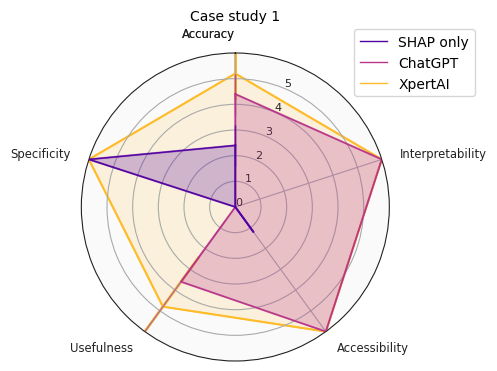

SHAP: accuracy [2, 2, 2, 2, 4]
SHAP: interpretability [0, 0, 0, 0, 0]
SHAP: accessibility [0, 0, 0, 0, 0]
SHAP: usefulness [0, 0, 0, 0, 0]
SHAP: specificity [6, 6, 6, 6, 6]


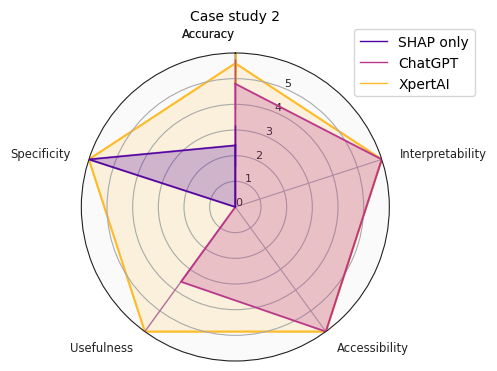

SHAP: accuracy [2, 2, 2, 2, 4]
SHAP: interpretability [0, 0, 0, 0, 6]
SHAP: accessibility [0, 0, 0, 0, 6]
SHAP: usefulness [0, 0, 0, 0, 0]
SHAP: specificity [6, 6, 6, 6, 6]


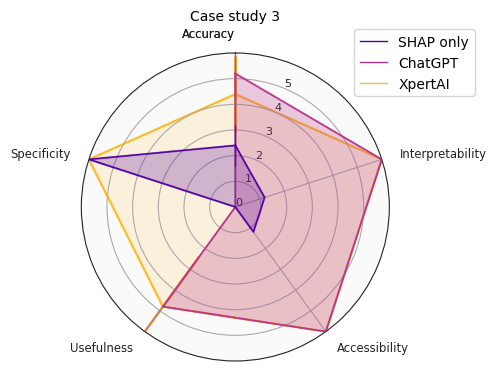

SHAP: accuracy [2, 2, 2, 2, 4]
SHAP: interpretability [0, 0, 0, 0, 6]
SHAP: accessibility [0, 0, 0, 0, 0]
SHAP: usefulness [0, 0, 0, 0, 0]
SHAP: specificity [6, 6, 6, 6, 6]


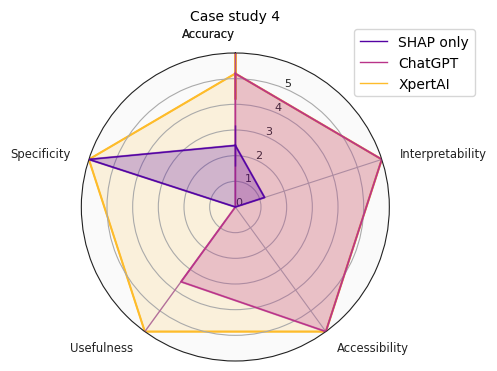

SHAP: accuracy [2, 2, 2, 2, 2]
SHAP: interpretability [0, 0, 0, 0, 0]
SHAP: accessibility [0, 0, 0, 0, 6]
SHAP: usefulness [0, 0, 0, 0, 0]
SHAP: specificity [6, 6, 6, 6, 6]


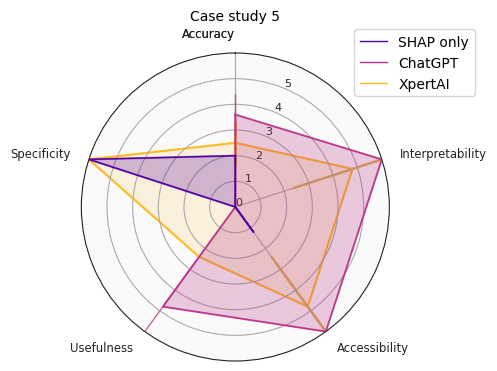

In [7]:
for task_num in tasks:
    exp_A_data = {}
    exp_B_data = {}
    exp_C_data = {}

    exp_A_er = {}
    exp_B_er = {}
    exp_C_er = {}


    for k,v in exp_A[task_num].items():
   
        ## expand counts to individual values
        #eg: accuracy [0,4,1,0] -> [2,2,2,2,4]
        counts_a = []
        for i,val in enumerate(exp_A[task_num][k]):
            w = weights[k][i]
            counts_a.append(np.repeat(w,val))  

        #flatten the list
        counts_a =[a  for ar in counts_a for a in ar]
        print('SHAP:',k, counts_a)
        exp_A_er[k] =  np.std(counts_a)
        exp_A_data[k] =  np.mean(counts_a)
        #print(k, np.mean([a  for ar in counts_a for a in ar]))

        counts_b = []
        for i,val in enumerate(exp_B[task_num][k]):
            if val != 0:
                w = weights[k][i]
                counts_b.append(np.repeat(w,val))  

        #flatten the list
        counts_b = [a  for ar in counts_b for a in ar]
        exp_B_er[k] =  np.std(counts_b )
        exp_B_data[k] =  np.mean(counts_b)


        counts_c = []
        for i,val in enumerate(exp_C[task_num][k]):
            w = weights[k][i]
            counts_c.append(np.repeat(w,val))  

        #flatten the list
        counts_c = [a  for ar in counts_c for a in ar]
        exp_C_er[k] =  np.std(counts_c)
        exp_C_data[k] =  np.mean(counts_c)


    plot_radar(exp_A_data,exp_B_data,exp_C_data,task_num,exp_A_er,exp_B_er,exp_C_er)
 

## plot per task withoud error bars

In [20]:
for task_num in tasks[:1]:

    exp_A_data = {}
    for k,v in exp_A[task_num].items():    
        score = np.sum(np.array(weights[k])* np.array(v))/num_experts
        exp_A_data[k] = score

    exp_B_data = {}
    for k,v in exp_B[task_num].items():    
        score = np.sum(np.array(weights[k])* np.array(v))/num_experts
        exp_B_data[k] = score

    exp_C_data = {}
    for k,v in exp_C[task_num].items():
        score = np.sum(np.array(weights[k])* np.array(v))/num_experts
        exp_C_data[k] = score

    plot_radar(exp_A_data,exp_B_data,exp_C_data,task_num)

array([2.4, 0. , 1.2, 0. , 6. , 2.4])

## Mean values

In [167]:
exp_A_data = defaultdict(list)
exp_B_data = defaultdict(list)
exp_C_data = defaultdict(list)
exp_A_er = {}
exp_B_er = {}
exp_C_er = {}

for task_num in tasks:    
    for k,v in exp_A[task_num].items():
        score_a = np.sum(np.array(weights[k])* np.array(v))/num_experts
        score_b = np.sum(np.array(weights[k])* np.array(exp_B[task_num][k]))/num_experts
        score_c = np.sum(np.array(weights[k])* np.array(exp_C[task_num][k]))/num_experts
        
        exp_A_data[k].append(score_a)
        exp_B_data[k].append(score_b)
        exp_C_data[k].append(score_c)



#exp_C_er[k] =  np.std(counts_c)
for k,v in exp_A_data.items():
    exp_A_data[k] = np.mean(v)
    exp_A_er[k] = np.std(v)

    exp_B_data[k] = np.mean(exp_B_data[k])
    exp_B_er[k] = np.std(exp_B_data[k])

    exp_C_data[k] = np.mean(exp_C_data[k])
    exp_C_er[k] = np.std(exp_C_data[k])

    #exp_A_data[k] = v/5

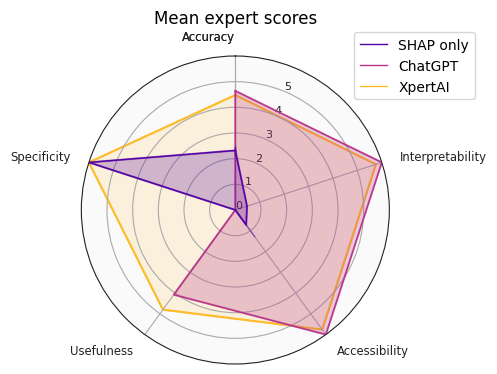

In [168]:
plot_radar(exp_A_data,exp_B_data,exp_C_data,
           'Mean expert scores',exp_A_er,exp_B_er,exp_C_er,
           figname='multi_data/figures/mean_expert_scores.png')